In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
car_dataset = pd.read_csv('/content/car_price_dataset.csv')

In [ ]:
car_dataset.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [ ]:
car_dataset.shape

(10000, 10)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [ ]:
car_dataset.isnull().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


In [ ]:
print(car_dataset.Brand.value_counts())
print(car_dataset.Model.value_counts())
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64
Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Tucson      329
Passat      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64
Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64
Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64


In [ ]:
#encoding 'Brand' column
car_dataset.replace({'Brand':{'Ford':0, 'Audi':1, 'Volkswagen':2, 'Honda':3, 'Chevrolet':4, 'BMW':5, 'Hyundai':6, 'Kia':7, 'Toyota':8, 'Mercedes':9}},inplace=True)

#encoding 'Model' column
car_dataset.replace({'Model':{'Accord':0, 'Fiesta':1, 'Impala':2, '5 Series':3, 'Tiguan':4, 'Focus':5, 'Q5':6, 'A4':7, 'Elantra':8, 'Golf':9, 'A3':10, 'Optima':11,  'Civic':12, '3 Series':13, 'Explorer':14, 'Malibu':15, 'Tucson':16, 'Passat':17, 'Rio':18,
                              'Corolla':19, 'RAV4':20, 'Camry':21, 'E-Class':22, 'Sonata':23, 'Equinox':24, 'GLA':25, 'Sportage':26, 'X5':27, 'CR-V':28, 'C-Class':29 }},inplace=True)

#encoding 'Fuel_Type' column
car_dataset.replace({'Fuel_Type':{'Electric':0, 'Diesel':1, 'Hybrid':2, 'Petrol':3}},inplace=True)

#encoding 'Transmission' column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1, 'Semi-Automatic':2}},inplace=True)

<ipython-input-69-867fb6fcff1f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Brand':{'Ford':0, 'Audi':1, 'Volkswagen':2, 'Honda':3, 'Chevrolet':4, 'BMW':5, 'Hyundai':6, 'Kia':7, 'Toyota':8, 'Mercedes':9}},inplace=True)
<ipython-input-69-867fb6fcff1f>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Model':{'Accord':0, 'Fiesta':1, 'Impala':2, '5 Series':3, 'Tiguan':4, 'Focus':5, 'Q5':6, 'A4':7, 'Elantra':8, 'Golf':9, 'A3':10, 'Optima':11,  'Civic':12, '3 Series':13, 'Explorer':14, 'Ma

In [ ]:
car_dataset.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,7,18,2020,4.2,1,0,289944,3,5,8501
1,4,15,2012,2.0,2,1,5356,2,3,12092
2,9,25,2020,4.2,1,1,231440,4,2,11171
3,1,6,2023,2.0,0,0,160971,2,1,11780
4,2,9,2003,2.6,2,2,286618,3,3,2867


Splitting the data into training data and Test data

In [ ]:
X = car_dataset.drop(['Price'],axis=1)
Y = car_dataset['Price']


In [ ]:
print(X)

      Brand  Model  Year  Engine_Size  Fuel_Type  Transmission  Mileage  \
0         7     18  2020          4.2          1             0   289944   
1         4     15  2012          2.0          2             1     5356   
2         9     25  2020          4.2          1             1   231440   
3         1      6  2023          2.0          0             0   160971   
4         2      9  2003          2.6          2             2   286618   
...     ...    ...   ...          ...        ...           ...      ...   
9995      7     11  2004          3.7          1             2     5794   
9996      4      2  2002          1.4          0             1   168000   
9997      5     13  2010          3.0          3             1    86664   
9998      0     14  2002          1.4          2             1   225772   
9999      2      4  2001          2.1          1             0   157882   

      Doors  Owner_Count  
0         3            5  
1         2            3  
2         4       

In [ ]:
print(Y)

0        8501
1       12092
2       11171
3       11780
4        2867
        ...  
9995     8884
9996     6240
9997     9866
9998     4084
9999     3342
Name: Price, Length: 10000, dtype: int64


Splitting Training and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
#loading the linear regression model
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

Model Evaluate

In [ ]:
training_data_prediction = lin_reg.predict(X_train)

In [ ]:
# r squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9094067171860327


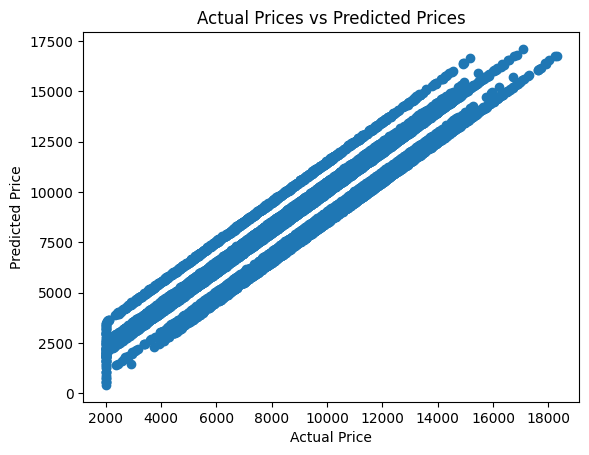

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = lin_reg.predict(X_test)

In [ ]:
# r squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9098447822312197


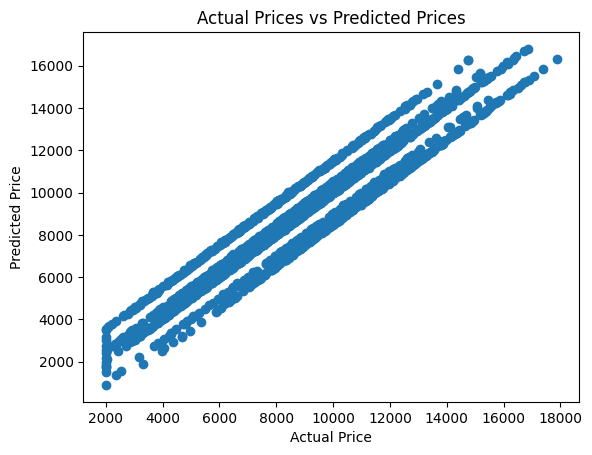

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
input_data = (2,9,2003,2.6,2,2,286618,3,3)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lin_reg.predict(input_data_reshaped)
print(prediction)

[2918.10694748]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
